In [73]:
from matplotlib import pyplot as plt
from collections import defaultdict

import networkx as nx

In [269]:
def dfs_build(G):
    max_depth = 0
    if len(G):
        max_depth = 1
        
    depth2wide = defaultdict(int)
    
    def get_drop(G, node, depth, value):
        if not G.out_edges(node):
            G.nodes[node]['x'] = value
            G.nodes[node]['y'] = depth
            depth2wide[depth] = value
            return value
        else:
            v1 = get_drop(G, list(G.out_edges(node))[0][1], depth + 1, max(depth2wide[depth + 1] + 1, value))
            v1 = max(v1, value, depth2wide[depth])
            depth2wide[depth] = v1
            G.nodes[node]['x'] = v1
            G.nodes[node]['y'] = depth
            
            for (_, v) in list(G.out_edges(node))[1:]:
                j2 = get_drop(G, v, depth + 1, depth2wide[depth + 1] + 1)
            
            return v1
    
    def dfs(G, node, depth, x):
        _ = get_drop(G, node, depth, x)
    
    dfs(G, 'n0', 0, 1)

In [272]:
def render_graph(input_filename, output_filename):
    G = nx.readwrite.graphml.read_graphml(input_filename)
    dfs_build(G)
    
    posG = {}
    for node in G.nodes():
        posG[node] = (G.nodes[node]['x'], - G.nodes[node]['y'])
        
    plt.figure(3, figsize=(12, 12)) 
    nx.draw(G, pos=posG, node_size=60, labels={k: k for k in posG.keys()}) 
    plt.savefig(output_filename)
    plt.show()
    plt.close()

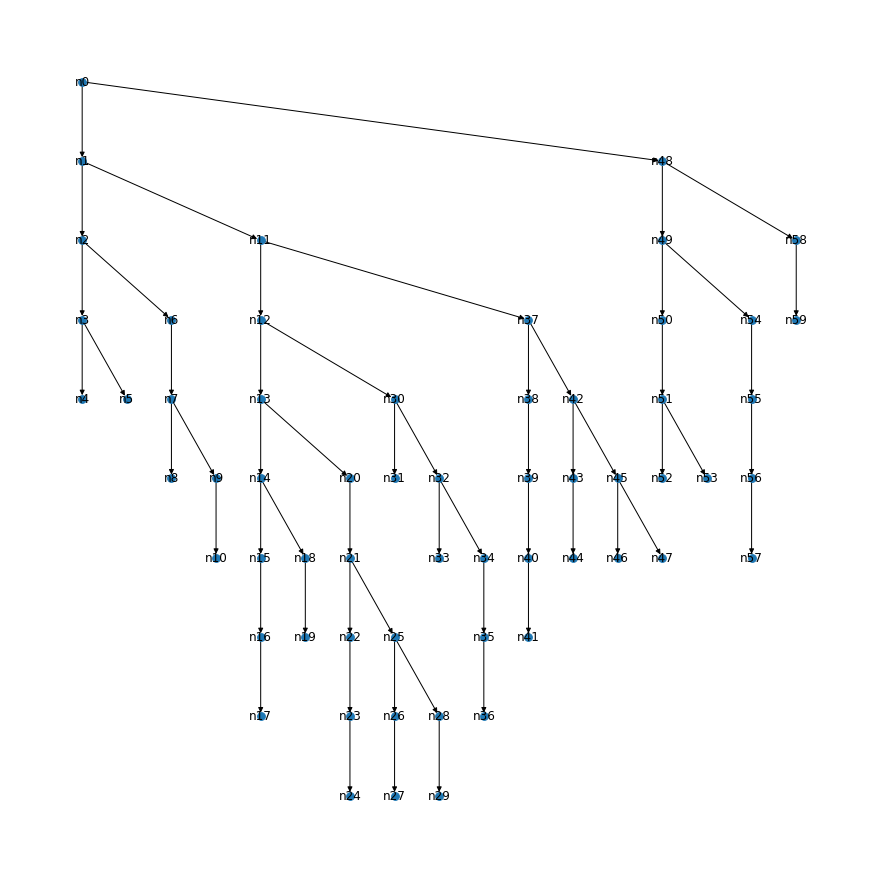

In [273]:
render_graph('./tree-60n.xml', 'output.png')